In [ ]:
!wget -q --show-progress -O genres.tar.gz "https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=1"


genres.tar.gz       100%[===================>]   1.14G  15.5MB/s    in 59s     


In [ ]:
!tar -xvzf genres.tar.gz
#blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
"""
-x → Extract
-z → Handle gzip compression
-f → Specify filename
-V → verbose (to show name of file)
"""

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

'\n-x → Extract\n-z → Handle gzip compression\n-f → Specify filename\n-V → verbose (to show name of file)\n'

In [ ]:
!rm genres.tar.gz

In [ ]:
import librosa

In [ ]:
from IPython.display import Audio
import librosa.display
import IPython.display as ipd

In [ ]:
filepath='/content/genres/metal/metal.00019.au'

In [ ]:
y,sr=librosa.load(filepath)

In [ ]:
ipd.Audio(y,rate=sr)

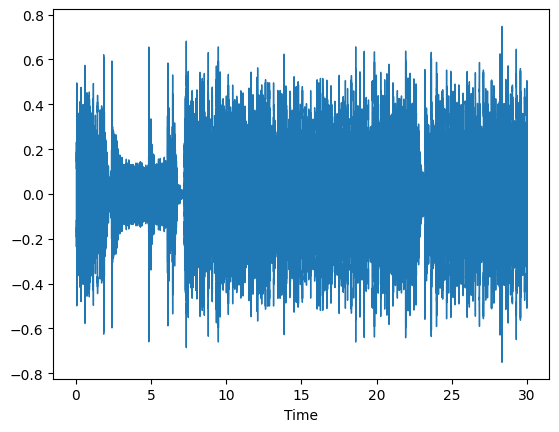

In [ ]:
librosa.display.waveshow(y,sr=sr)

#importing all packages needed

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import random
import librosa
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models

### getting/making all directories

In [ ]:
data_dir = "/content/genres/"
train_dir = "/content/train/"
test_dir = "/content/test/"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [ ]:
file_paths = []
labels = []

for genre in os.listdir(data_dir):
    genre_path = os.path.join(data_dir, genre)

    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.endswith(".au"):
                file_paths.append(os.path.join(genre_path, file))
                labels.append(genre)

In [ ]:
# Convert labels to numeric
label_to_index = {genre: i for i, genre in enumerate(set(labels))}
labels_numeric = np.array([label_to_index[label] for label in labels])


### Splitting the audio files into train (800) and test (200) and moving them to their respective directories

In [ ]:

train_files, test_files, train_labels, test_labels = train_test_split(
    file_paths,labels, test_size=0.2, stratify=labels, random_state=42
)

print(f"Train set: {len(train_files)} samples")
print(f"Test set: {len(test_files)} samples")


Train set: 800 samples
Test set: 200 samples


In [ ]:
def move_files(file_list, destination_folder):
    for file in file_list:
        genre = file.split("/")[-2]
        genre_folder = os.path.join(destination_folder, genre)
        os.makedirs(genre_folder, exist_ok=True)
        shutil.move(file, os.path.join(genre_folder, os.path.basename(file)))


# Moving files to their respective directories
move_files(train_files, train_dir)
move_files(test_files, test_dir)

In [ ]:
# Audio processing parameters
SR = 22050  # Sampling rate best for music genre identification and medium computational cost
n_mfcc=40
num_time_windows=180
batch_size=32
epochs=30
num_classes = 10

In [ ]:
def extract_mfcc(file_path,sr=SR,n_mfcc=n_mfcc,max_len=num_time_windows):

  audio,_=librosa.load(file_path,sr=sr)

  mfcc=librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=n_mfcc)
  #shape[1] means no. of columns i.e., no. of time frames is less than 180 then padding
  if mfcc.shape[1]<max_len:
    pad_len=max_len-mfcc.shape[1]
    mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_len)),mode='constant')
    # pad_width((no. of coefficients),(number of time frames))
    # pad_width((0,0),...) means no.of coefficients doesn't increase but number of time frames increases.
  else:
    mfcc=mfcc[:,:max_len]
    # in case we get more than 180 frames originally
  return mfcc


In [ ]:
"""Understanding Padding Format (before, after)
For each axis in a NumPy array, the padding is specified as a tuple (before_pad, after_pad), meaning:

before_pad → How many values to add at the start of the axis.
after_pad → How many values to add at the end of the axis.
Why (0, pad_len)?
In this case, mfcc has the shape (num_features, time_steps), where:

Axis 0 (num_features) → Represents frequency bins (e.g., 13 or 40 MFCC coefficients). We do not want to pad this axis, so we use (0, 0).
Axis 1 (time_steps) → Represents the time frames of the audio feature. We want to add padding at the end to reach max_len, so we use (0, pad_len)."""

'Understanding Padding Format (before, after)\nFor each axis in a NumPy array, the padding is specified as a tuple (before_pad, after_pad), meaning:\n\nbefore_pad → How many values to add at the start of the axis.\nafter_pad → How many values to add at the end of the axis.\nWhy (0, pad_len)?\nIn this case, mfcc has the shape (num_features, time_steps), where:\n\nAxis 0 (num_features) → Represents frequency bins (e.g., 13 or 40 MFCC coefficients). We do not want to pad this axis, so we use (0, 0).\nAxis 1 (time_steps) → Represents the time frames of the audio feature. We want to add padding at the end to reach max_len, so we use (0, pad_len).'

In [ ]:
"""Why Use mode='constant'?
'constant' mode fills the new values with a constant (default 0).
Other modes like 'edge' or 'reflect' would use existing values instead."""

"Why Use mode='constant'?\n'constant' mode fills the new values with a constant (default 0).\nOther modes like 'edge' or 'reflect' would use existing values instead."

#### Making a list of all the audio file paths and also a list of their respective labels

In [ ]:
def prep(file_dir):
  x=[]
  y=[]


  for genre in os.listdir(train_dir):
      genre_path = os.path.join(train_dir, genre)
      if os.path.isdir(genre_path):
          for file in os.listdir(genre_path):
              if file.endswith(".au"):
                  mfcc = extract_mfcc(os.path.join(genre_path, file))
                  x.append(mfcc)
                  y.append(label_to_index[genre])

  x=np.array(x)
  y=to_categorical(y,num_classes=num_classes)
  return x,y

In [ ]:
train_x,train_y= prep(train_dir)

In [ ]:
def build_model(input_shape):

  model=models.Sequential([
                            layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),

                            layers.Conv2D(64,(3,3),activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),

                            layers.Conv2D(128,(3,3),activation='relu'),
                            layers.BatchNormalization(),
                            layers.MaxPooling2D((2,2)),

                            layers.Flatten(),
                            layers.Dense(256,activation='relu'),
                            layers.Dropout(0.6),
                            layers.Dense(num_classes,activation='softmax')

                          ]

                          )
  return model


In [ ]:
model=build_model((n_mfcc,num_time_windows,1)) #(40,180,1) input

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 178, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 178, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 43, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 41, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 41, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 20, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7680)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,966,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,062,474 (7.87 MB)

 Trainable params: 2,062,026 (7.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
'''early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)
'''

'early_stopping = tf.keras.callbacks.EarlyStopping(\n    monitor="val_loss", patience=5, restore_best_weights=True\n)\n'

In [ ]:
model.fit(train_x,train_y, epochs=epochs, batch_size=batch_size)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1821 - loss: 5.7284
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3103 - loss: 1.9367
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3745 - loss: 1.7749
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3787 - loss: 1.6469
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3849 - loss: 1.5417
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4809 - loss: 1.4470
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4902 - loss: 1.3941
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4972 - loss: 1.4626
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5379 - loss: 1.3360
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6011 - loss: 1.1395
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6106 - loss: 0.9879
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6503

# Testing on test data


In [ ]:
test_x,test_y=prep(train_dir)

loss, accuracy = model.evaluate(test_x, test_y, verbose=1)
print(f" Test Accuracy: {accuracy * 100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0275
✅ Test Accuracy: 99.50%


In [ ]:
audio_path = "/content/test/hiphop/hiphop.00019.au"

# Preprocess the audio file
mfcc = extract_mfcc(audio_path)
mfcc = np.expand_dims(mfcc, axis=0)

# Predict using the model
predictions = model.predict(mfcc)

# Convert prediction to label
predicted_label = np.argmax(predictions)
genre_name = [genre for genre, idx in label_to_index.items() if idx == predicted_label][0]

# Print results
print(f" Predicted Genre: {genre_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
 Predicted Genre: hiphop
